# Машинное обучение, ШАД
## Домашнее задание 5


**Правила:**

* Дедлайн **16 октября 15:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * прикрепив ее в ЛМС в форматах `pdf`, `png` или `jpg` *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $\LaTeX$ в markdown-ячейках или в отдельном `pdf`-файле.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 0,5 балла
* Задача 2 &mdash; 1 балл
* Задача 3 &mdash; 1 балл
* Задача 4 &mdash; 1 балл
* Задача 5 &mdash; 2 балла


---
### Задача 1. 

Ученые придумали новый тест для определения одной очень известной болезни, который показывает поразительные свойства:
* Вероятность того, что тест покажет положительный результат, если человек и правда болен, составляет 99%;
* Вероятность того, что тест покажет положительный результат, если человек на самом деле не болен, составляет 3%.

Посчитайте вероятность того, что человек реально болен, если тест показал положительный результат, с помощью формулы Байеса. Также известно, что в среднем на 100 случайных человек приходится двое болеющих.

---
Определим события:

$A$="человек болен",

$B$="человек здоров", 

$A_{p}$="предсказали, что болен", 

$B_{p}$="предсказали, что здоров".

Знаем, что $P(A_{p}|A)=0.99$, $P(A_{p}|B)=0.03$, $P(A)=0.02$, $P(B) = 1-P(A)=0.98$.
Хотим найти $P(A|A_{p})$

Тогда, по формуле Байеса:
$$
P(A|A_{p})=\frac{P(A_{p}|A)P(A)}{P(A_{p})}
$$

Разложим знаменатель по формуле полной вероятности:
$$
P(A_{p}) = P(A_{p}|A)P(A)+P(A_{p}|B)P(B)=0.99\cdot 0.02+0.03 \cdot 0.98
$$
Итого:

$$
P(A|A_{p})=\frac{0.99\cdot 0.02}{0.99\cdot 0.02+0.03 \cdot 0.98}\approx 0.4
$$


---
### Задача 2. 

Рассмотрим два случая.

**a).** Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta, 1)$. 

**b).** Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \theta^{-1})$. 

В каждом случае подберите сопряженное семейство распределений и найдите соответствующее апостериорное распределение параметра $\theta$, а также его математическое ожидание.

Подумайте, какое распределение является сопряженным в случае если неизвестны оба параметра нормального распределения.


---
### Задача 3.

Рассмотрим столбец Alcalinity of ash датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. Цель &mdash; оценить среднего значения этого признака. 

Для простоты дальнейших вычислений выберите некоторым образом дисперсию данных и считайте ее известной. На практике это не так, и дисперсию можно и нужно оценивать, но мы не хотим сильно усложнять учебную задачу.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import time
import math
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

cols = ["Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]

df = pd.read_csv("wine.data", names=cols, index_col=False)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df['Alcalinity of ash'].describe()

count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: Alcalinity of ash, dtype: float64

Будем считать дисперсию = $\sigma = \frac{35 - 24}{3} =  \frac{24 - 13}{3} = \frac{11}{3}$

In [15]:
sigma = 11./3  

Из класса сопряженных распределений выберите априорное распределение для среднего значения на основе своих представлений, не используя данные. Подсказка: загляните в семинар.

---

Выберем в качестве априорного распределния – Коши(0, 1) 

Визуализируйте динамику изменения апостериорного распределения, последовательно добавляя к данным по 20 объектов. Примеры кода можно посмотреть в семинаре.

In [18]:
sample_norm = df["Alcalinity of ash"].values

In [20]:
def eval_c(sample_norm, cauchy_sample_size=100000):
    '''
    Функция для оценки константы в знаменателе формулы Байеса.
    
    :param sample_norm: выборка из нормального распределения.
    :param cauchy_sample_size: размер выборки для метода Монте-Карло
                        
    :returns: оценка константы
    '''
    
    sample_cauchy = sps.cauchy(loc=24).rvs(
        size=cauchy_sample_size
    ).reshape(1, -1)
    sample_norm = sample_norm.reshape(-1, 1)
    
    return np.mean(
        sps.norm(loc=sample_cauchy, scale=sigma).pdf(sample_norm).prod(axis=0)
    )



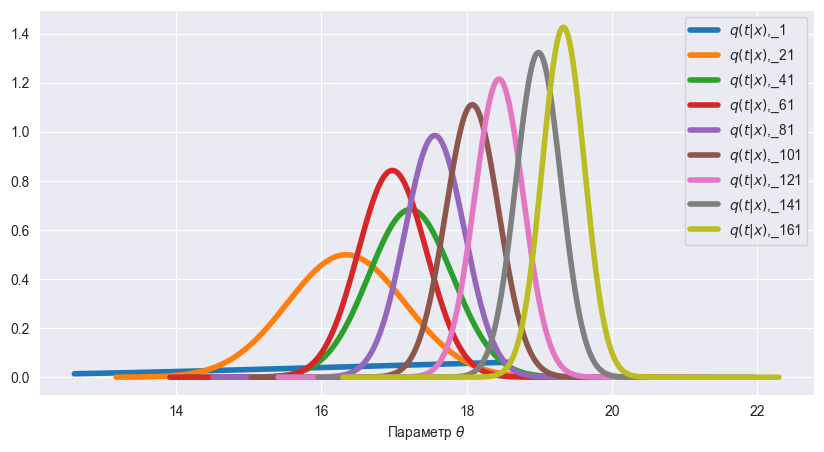

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))


for n in range(1, len(sample_norm), 20):
    tmp_sample_norm = sample_norm[:n]
    c = eval_c(tmp_sample_norm, 100000)
    grid = np.linspace(-3 + tmp_sample_norm.mean(), 3 + tmp_sample_norm.mean(), 500000)

    density = np.exp(-((tmp_sample_norm.reshape(-1, 1) - \
                        grid) / sigma)**2 / 2).prod(axis=0) * \
                        sps.cauchy(loc=24.).pdf(grid) / c * \
                        np.power(1 / np.sqrt(2 * np.pi) / sigma, len(tmp_sample_norm))
    plt.plot(grid, density, label=r"$q(t | x)$,"+f"_{n}", lw=4)\
    

plt.xlabel("Параметр $\\theta$")
plt.legend()
plt.show()     

**Вывод:**

<...>

---
### Задача 4.

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *максимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск. Необходимо записать формулу шага и реализовать процедуру оптимизации.

<details>
  <summary>Подсказка</summary>

Посчитайте производную этой функции по $\theta$, поменяв местами интеграл (мат. ожидание) и производную. Далее оцените мат. ожидание по методу Монте-Карло.

</details>

In [73]:
def derivative(xi, eta, theta):
    return 2*np.square(xi)*np.sqrt(eta)*theta*f(xi, eta, theta)/np.square(np.square(theta)+1)

def f(xi, eta, theta):
    return np.exp(-(np.square(xi)*np.sqrt(eta))/(1+np.square(theta))) 

def integrate_monte_carlo(f, n, theta):
    """
    Метод монте-карло
    f --- векторная функция d-мерной переменной.
        Реализация функции на вход принимает матрицу (n, d),
        где n - число точек, в которых нужно вычислить функцию,
        а d - размерность пространства переменных.
        Функция должна вернуть вектор размерности n.
    low, high --- нижние и верхние пределы интегрирования.
        Передаются в том же порядке, в котором функция 
        принимает аргументы).
    n --- максимальное число вызовов функции f.
    """
    # случайные точки, в которых будем вычислять функцию
    xis = sps.norm.rvs(loc=0, scale=1, size=(n))
    poisson = sps.poisson(mu=5)
    etas = poisson.rvs(size=(n))

    # вычисление функции в случайных точках
    return (np.mean(f(xis, etas, theta)))

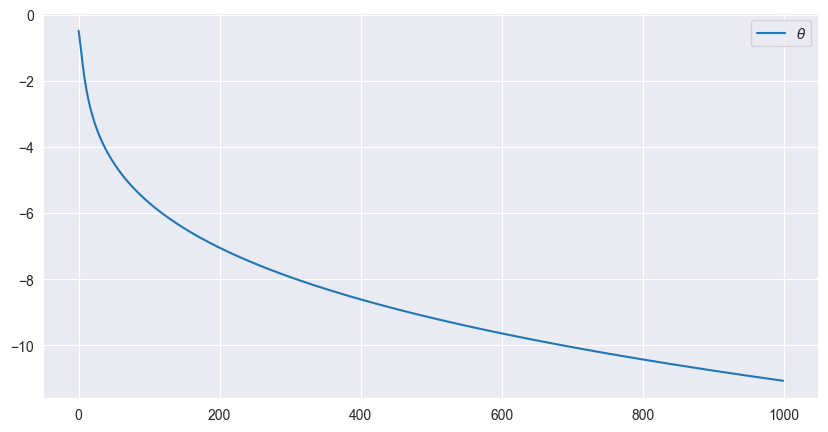

In [79]:
theta_0 = sps.norm.rvs(size=(1))

theta_history = []
score_history = []
lr = 1

for i in range(1000):
    theta_history.append(theta_0)
    grad = integrate_monte_carlo(derivative, 100000, theta_0)
    theta_0 = theta_0 + lr*grad
    score_history.append(integrate_monte_carlo(f, 100000, theta_0))

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(theta_history, label="$\\theta$")
plt.legend()

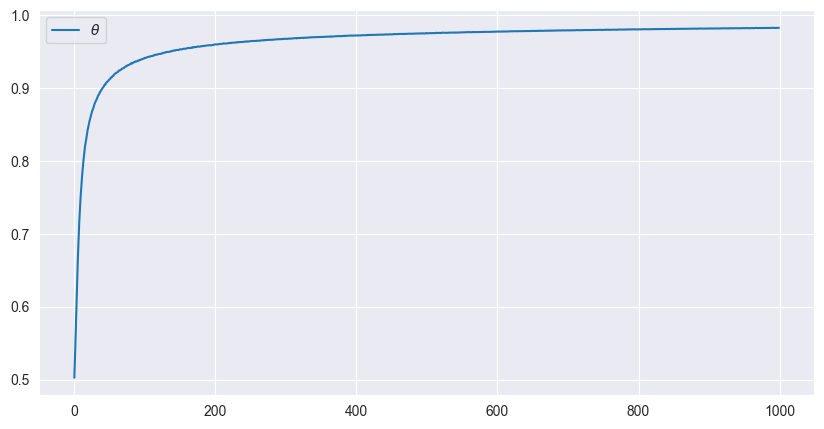

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(score_history, label="$\\theta$")
plt.legend()

---
### Задача 5.

> *Не забывайте примеры кода смотреть в семинарских ноутбуках.*

Загрузите данные `flats_moscow.txt` о стоимости квартир в Москве

In [ ]:
data = pd.read_csv('./flats_moscow.txt', sep='\t', index_col=0)
data.head()

Постройте график зависимости цены квартиры (price) от ее общей площади (totsp). Что можно сказать о данных?

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['totsp'], data['price'], alpha=0.3)
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Цена квартиры');

Постройте с помощью PyMC линейную регрессию для предсказания цены квартиры (price) от ее общей площади (totsp). Используйте следующие распределения:
* Априорное распределение на коэффициенты &mdash; нормальное с нулевым средним и среднеквадратичным разбросом 20;
* Ошибка имеет нормальное распределение с нулевым средним;
* Априорное распределение на дисперсию ошибки &mdash; модуль распределения Коши.

Запишите модель формулами:

<...>

Реализуйте эту модель и проведите 3000 итераций семплирования

In [ ]:
with pm.Model() as model:
    <...>

Постройте `pm.plot_trace`. Что можно по нему сказать? Какое апострериорное распределение имеют параметры модели?

In [ ]:
<...>

Теперь вам нужно построить предсказательный интервал (ленту) для каждого $x$ по сетке значений totsp, взяв область, в которую попадает 95% вероятностной массы апостериорного распределения. Иначе говоря, на основе построенной модели нужно для каждой площади квартиры $x$ вычислить 95%-й диаппазон цен на квартиры с такой мощностью.

Для выполнения этого пункта задайте сетку значений площади квартиры и с помощью `pm.sample_posterior_predictive` проведите 10000 итераций семплирования из предиктивного распределения.

In [ ]:
<...>

Проверьте размерность полученной матрицы чисел, она должна быть равна $(10000, N)$, где $N$ &mdash; количество значений $x$ в выбранной вами сетке. Тем самым для каждого значения $x$ у вас есть 10000 независимых реализаций цены квартиры с такой площадью. Далее по этим реализациям вы можете посчитать все интересующие вас характеристики.

*Замечание.* На самом деле полученные значения строго не являются независимыми, но мы не будем обращать на это внимание. Если вам будет интересно, можно подробнее почитать про методы MCMC.

In [ ]:
<...>

На основе полученных семплов постройте график предсказательного интервала (ленты). Для этого можно взять квантили у семплов для каждого $x$.

In [ ]:
<...>

Что вы можете сказать по этому графику?

Предложите способ, как исправить модель. Реализуйте эту модель, постройте для нее график предсказательного интервала.

In [ ]:
<...>

Теперь проведем небольшую аналитику. Допустим, мы хотим купить квартиру площадью 75 квадратных метров. Простройте график плотности предсказательного распределения цены такой квартиры. Посчитайте также вероятность того, что квартира площадью 75 квадратных метров имеет цену не более 100.

In [ ]:
<...>

Насколько вообще изменяется цена квартиры при увеличении ее площади на 1 метр? Постройте для этого апостериорное распределение этого параметра, а также посчитайте среднее значение и 95%-й интервал

In [ ]:
<...>